In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('nasa_asteroid.csv')

In [3]:
# Drop non-relevant features
X = data.drop(['Neo Reference ID', 'Name', 'Close Approach Date', 'Epoch Date Close Approach', 'Orbit Determination Date', 'Equinox', 'Hazardous'], axis=1)
y = data['Hazardous']

In [8]:
# Encode categorical features
label_encoder = LabelEncoder()
X['Orbiting Body'] = label_encoder.fit_transform(data['Orbiting Body'])

In [9]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [10]:
# Scale the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Initialize MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [12]:
# Train the model
mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [13]:
# Make predictions
y_pred = mlp.predict(X_test_scaled)

In [14]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")

Overall Accuracy: 0.9780


In [15]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1171    9]
 [  22  205]]


In [16]:
# Training/test accuracy plot
train_acc = mlp.score(X_train_scaled, y_train)
test_acc = mlp.score(X_test_scaled, y_test)

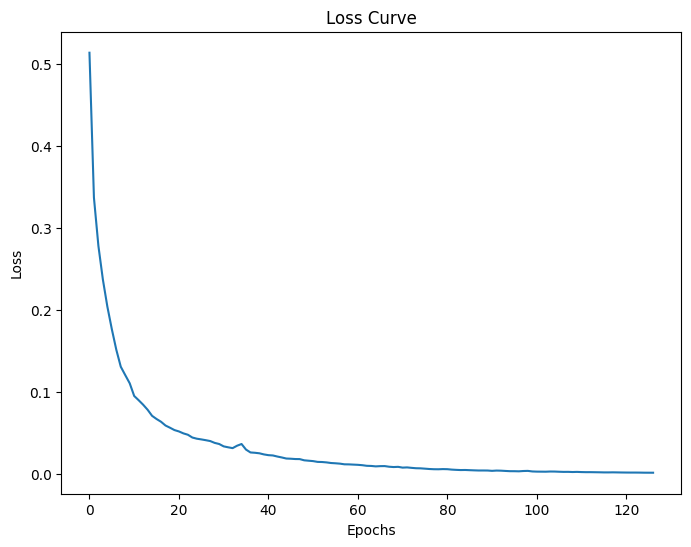

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [18]:
# Hyperparameter tuning
hidden_layer_sizes = [(50,), (100,), (100, 50), (200, 100)]
results = []

for hidden_layer in hidden_layer_sizes:
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer, max_iter=1000, random_state=42)
    mlp.fit(X_train_scaled, y_train)
    train_acc = mlp.score(X_train_scaled, y_train)
    test_acc = mlp.score(X_test_scaled, y_test)
    results.append({'Hidden Layers': hidden_layer, 'Train Accuracy': train_acc, 'Test Accuracy': test_acc})


In [19]:
# Display results
results_df = pd.DataFrame(results)
print("\nHyperparameter Tuning Results:")
print(results_df)


Hyperparameter Tuning Results:
  Hidden Layers  Train Accuracy  Test Accuracy
0         (50,)        0.999695       0.983653
1        (100,)        1.000000       0.981521
2     (100, 50)        1.000000       0.977967
3    (200, 100)        1.000000       0.978678
